In [1]:
import numpy as np
import librosa

In [10]:
no_coeff = 19
fs = 8000
speech, _ = librosa.load('/nas/rishith/datasets/asvSpoof2019/DS_10283_3336/LA/ASVspoof2019_LA_train/flac/LA_T_1000137.flac')

fqstep = 20
fq = np.array([*range(0,int(fs/2)+1,fqstep)])

rval = 0.998

In [25]:
nf = len(fq)
len_s_buff = [*range(1, len(speech)+1, 1)]
len_s_buff = np.array(len_s_buff).reshape(1, len(len_s_buff))

nwi = 2*np.pi*fq/fs
nwi = nwi.reshape(1, len(nwi))

In [26]:
exp1 = np.multiply(nwi.T, len_s_buff)

In [40]:
exp2 = np.exp(-1j*exp1)

In [135]:
envelope = np.zeros([len(speech), nf])
scomp = np.zeros([len(speech), nf])

In [123]:
sum1 = np.zeros([len(speech), 1])

In [124]:
s1 = speech.reshape(len(speech),1)

In [125]:
s1.shape

(55134, 1)

In [126]:
exp2.shape

(201, 55134)

In [127]:
# s1[:, np.newaxis].T.shape
# sh_sig = exp2 * s1.T
sh_sig = (exp2.T *s1).T

In [128]:
sh_sig.shape

(201, 55134)

In [129]:
real_sh_sig = np.real(sh_sig)
imag_sh_sig = np.angle(sh_sig)

In [130]:
from scipy.signal import lfilter

In [136]:
b = [1]
a = np.array([1, rval])
spec_amp_r = lfilter(b, a, real_sh_sig.T,axis=0)
spec_amp_i = lfilter(b, a, imag_sh_sig.T, axis = 0)

print(spec_amp_r.shape)
print(spec_amp_i.shape)

(55134, 201)
(55134, 201)


In [137]:
envelope1 = np.sqrt(np.square(spec_amp_r) + np.square(spec_amp_i))
print(envelope1.shape)

(55134, 201)


In [138]:
envelope = envelope + envelope1
print(envelope.shape)

(55134, 201)


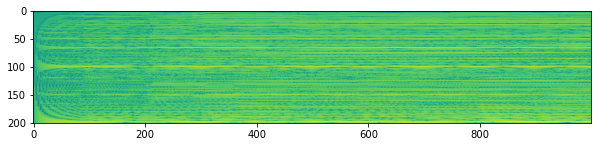

In [139]:
plt.figure(figsize=(10,5))
plt.imshow(np.log(envelope.T[:,0:1000]))
plt.show()